In [125]:
#Importing the library

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [79]:
data = 'C:/Users/HP/Documents/workspace/Ml-opzoomcamp/AER_credit_card_data.csv'
df = pd.read_csv(data)

# Goal

**The goal of this homework is to inspect the output of different evaluation metrics by creating a classification model (target column card).**

In [80]:
df

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,yes,0,33.58333,4.5660,0.002146,7.333333,yes,no,0,94,1,19
1315,no,5,23.91667,3.1920,0.000376,0.000000,no,no,3,12,1,5
1316,yes,0,40.58333,4.6000,0.026513,101.298300,yes,no,2,1,1,2
1317,yes,0,32.83333,3.7000,0.008999,26.996670,no,yes,0,60,1,7


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB


In [82]:
df.columns

Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [83]:
categorical = ['owner','selfemp']
numerical = ['reports', 'age', 'income', 'share', 'expenditure', 'dependents', 'months', 'majorcards', 'active']

In [84]:
df[categorical]

,owner,selfemp
0,yes,no
1,no,no
2,yes,no
3,no,no
4,yes,no
...,...,...
1314,yes,no
1315,no,no
1316,yes,no
1317,no,yes


In [85]:
df['card']  = (df['card'] == 'yes').astype(int)

In [86]:
df

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1,0,33.58333,4.5660,0.002146,7.333333,yes,no,0,94,1,19
1315,0,5,23.91667,3.1920,0.000376,0.000000,no,no,3,12,1,5
1316,1,0,40.58333,4.6000,0.026513,101.298300,yes,no,2,1,1,2
1317,1,0,32.83333,3.7000,0.008999,26.996670,no,yes,0,60,1,7


From the card feature:

**1 means yes**


**0 means no**

In [87]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [88]:
len(df_full_train), len(df_test)

(1055, 264)

In [89]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [90]:
len(df_train), len(df_test), len(df_val)

(791, 264, 264)

In [91]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [92]:
y_train = df_train['card'].values
y_val = df_val['card'].values
y_test = df_test['card'].values

In [93]:
del df_train['card']
del df_val['card']
del df_test['card']

In [94]:
df_train

,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,3,40.50000,4.0128,0.000299,0.00000,no,no,1,12,1,17
1,1,32.33333,6.0000,0.000200,0.00000,yes,no,4,18,1,4
2,1,29.16667,2.2000,0.038205,69.79333,no,no,0,49,1,7
3,1,54.66667,7.2900,0.106536,647.20670,yes,no,2,78,1,9
4,0,25.00000,3.3984,0.000353,0.00000,yes,no,2,29,0,4
...,...,...,...,...,...,...,...,...,...,...,...
786,0,53.00000,2.4500,0.017718,35.67500,yes,no,0,3,1,11
787,2,30.58333,2.5000,0.000480,0.00000,no,no,0,12,1,18
788,0,24.75000,1.8750,0.080708,126.02250,no,no,1,14,0,1
789,1,56.91667,3.4838,0.062895,182.09580,yes,no,0,540,1,7


# Question 1


**ROC AUC could also be used to evaluate feature importance of numerical variables.**

**Let's do that**

- **For each numerical variable, use it as score and compute AUC with the card variable.**


- **Use the training dataset for that.**


**If your AUC is < 0.5, invert this variable by putting "-" in front**


**(e.g. -df_train['expenditure'])**

**AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.**


**Which numerical variable (among the following 4) has the highest AUC?**


- **reports**


- **dependents**


- **active**


- **share**

In [95]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [96]:
#using roc_auc_score for feature importance

for c in numerical:
    auc = roc_auc_score(y_train, df_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
    print('%9s, %.3f' % (c, auc))

  reports, 0.717
      age, 0.524
   income, 0.591
    share, 0.989
expenditure, 0.991
dependents, 0.533
   months, 0.529
majorcards, 0.534
   active, 0.604


**Share has the highest AUC.**

# Training the model


**From now on, use these columns only:**


**["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]**


**Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:**


**LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)**

In [97]:
train_dict = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)


val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)


In [98]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [99]:
y_pred = model.predict_proba(X_val)[:, 1]


# Question 2

**What's the AUC of this model on the validation dataset? (round to 3 digits)**

- **0.615**


- **0.515**


- **0.715**


- **0.995**

In [100]:
round(roc_auc_score(y_val, y_pred), 3)


0.995

**0.995 is the AUC of this model on the validation dataset.**

# Question 3

**Now let's compute precision and recall for our model.**


**Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01**


**For each threshold, compute precision and recall**


**Plot them**


**At which threshold precision and recall curves intersect?**

- **0.1**

- **0.3**

- **0.6**

- **0.8**

In [101]:
def confusion_matrix_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    
    return df_scores

In [102]:
df_scores = confusion_matrix_dataframe(y_val, y_pred)


In [103]:
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,211,53,0,0
10,0.1,210,17,1,36
20,0.2,207,5,4,48
30,0.3,205,5,6,48
40,0.4,205,1,6,52
50,0.5,204,1,7,52
60,0.6,204,1,7,52
70,0.7,204,1,7,52
80,0.8,204,1,7,52
90,0.9,204,0,7,53


In [104]:
df_scores['precision'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['recall'] = df_scores.tp / (df_scores.tp + df_scores.fn)

In [105]:
df_scores[::10]

,threshold,tp,fp,fn,tn,precision,recall
0,0.0,211,53,0,0,0.799242,1.000000
10,0.1,210,17,1,36,0.925110,0.995261
20,0.2,207,5,4,48,0.976415,0.981043
30,0.3,205,5,6,48,0.976190,0.971564
40,0.4,205,1,6,52,0.995146,0.971564
50,0.5,204,1,7,52,0.995122,0.966825
60,0.6,204,1,7,52,0.995122,0.966825
70,0.7,204,1,7,52,0.995122,0.966825
80,0.8,204,1,7,52,0.995122,0.966825
90,0.9,204,0,7,53,1.000000,0.966825


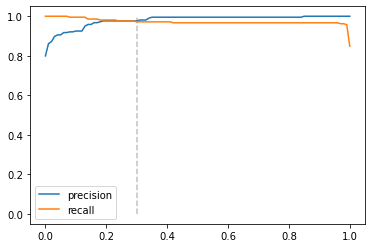

In [106]:
plt.plot(df_scores.threshold, df_scores.precision, label='precision')
plt.plot(df_scores.threshold, df_scores.recall, label='recall')

plt.vlines(0.3, 0, 1, color='grey', linestyle='--', alpha=0.5)

plt.legend()
plt.show()

# Question 4


**Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both**

**This is the formula for computing F1:**

**F1 = 2 * P * R / (P + R)**

**Where P is precision and R is recall.**

**Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01**

**At which threshold F1 is maximal?**

- **0.1**

- **0.4**

- **0.6**

- **0.7**

In [107]:
df_scores['f1score'] = 2 * df_scores.precision * df_scores.recall / (df_scores.precision + df_scores.recall)

In [108]:
df_scores[::10]

,threshold,tp,fp,fn,tn,precision,recall,f1score
0,0.0,211,53,0,0,0.799242,1.000000,0.888421
10,0.1,210,17,1,36,0.925110,0.995261,0.958904
20,0.2,207,5,4,48,0.976415,0.981043,0.978723
30,0.3,205,5,6,48,0.976190,0.971564,0.973872
40,0.4,205,1,6,52,0.995146,0.971564,0.983213
50,0.5,204,1,7,52,0.995122,0.966825,0.980769
60,0.6,204,1,7,52,0.995122,0.966825,0.980769
70,0.7,204,1,7,52,0.995122,0.966825,0.980769
80,0.8,204,1,7,52,0.995122,0.966825,0.980769
90,0.9,204,0,7,53,1.000000,0.966825,0.983133


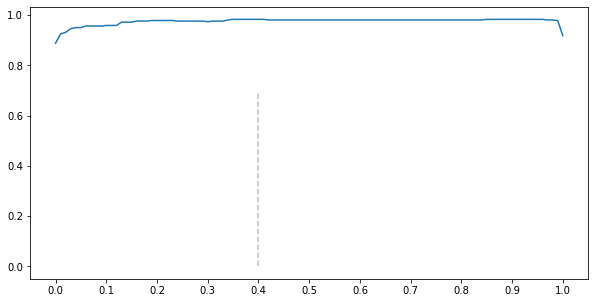

In [109]:
plt.figure(figsize=(10, 5))

plt.plot(df_scores.threshold, df_scores.f1score)
plt.vlines(0.4, 0, 0.7, color='grey', linestyle='--', alpha=0.5)

plt.xticks(np.linspace(0, 1, 11))
plt.show()

# Question 5

**Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:**

**KFold(n_splits=5, shuffle=True, random_state=1)**


- **Iterate over different folds of df_full_train**


- **Split the data into train and validation**


- **Train the model on train with these parameters: LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)**


- **Use AUC to evaluate the model on validation**


**How large is standard devidation of the AUC scores across different folds?**

- **0.003**

- **0.014**

- **0.09**

- **0.24**

In [110]:
from sklearn.model_selection import KFold

In [117]:
df_train.columns

Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [118]:
features = [ 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active']

In [114]:
df_train

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
710,0,1,36.83333,3.0000,0.000400,0.0000,yes,no,1,12,1,16
1258,1,0,35.58333,3.5606,0.109084,323.5875,no,no,0,12,1,0
1286,1,1,48.66667,6.0000,0.177017,885.0858,yes,no,3,114,1,19
1013,1,0,37.08333,7.0000,0.154016,898.4258,yes,no,3,24,1,8
1185,1,0,49.66667,4.9600,0.105482,435.9908,yes,no,4,168,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...
960,0,3,31.66667,7.5000,0.000160,0.0000,no,no,0,30,1,7
847,0,0,36.08333,4.1000,0.000293,0.0000,yes,no,2,30,1,0
1096,1,0,19.16667,1.9000,0.282962,448.0233,no,no,0,192,0,1
235,1,0,30.83333,3.0000,0.062629,156.5725,yes,no,2,72,1,8


In [119]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[features].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X_train, y_train)

    return dv, model

def predict(df, dv, model):
    dicts = df[features].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [120]:
scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.card.values
    y_val = df_val.card.values

    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.996 +- 0.003


**It is large by 0.003**

# Question 6

**Now let's use 5-Fold cross-validation to find the best parameter C**

**Iterate over the following C values: [0.01, 0.1, 1, 10]**


**Initialize KFold with the same parameters as previously**


**Use these parametes for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)**


**Compute the mean score as well as the std (round the mean and std to 3 decimal digits)**


**Which C leads to the best mean score?**


- **0.01**

- **0.1**

- **1**

- **10**


**If you have ties, select the score with the lowest std. If you still have ties, select the smallest C**

In [121]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in [0.01, 0.1, 1, 10]:
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.card.values
        y_val = df_val.card.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%4s, %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=0.01, 0.992 +- 0.006
C= 0.1, 0.995 +- 0.004
C=   1, 0.996 +- 0.003
C=  10, 0.996 +- 0.003


**1 leads to the best mean score**